In [10]:
from __future__ import print_function
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K




In [42]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Nadam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.4792 - acc: 0.8310 - val_loss: 0.3027 - val_acc: 0.8868
Epoch 2/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.3168 - acc: 0.8859 - val_loss: 0.2603 - val_acc: 0.9053
Epoch 3/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2707 - acc: 0.9005 - val_loss: 0.2459 - val_acc: 0.9058
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2404 - acc: 0.9112 - val_loss: 0.2558 - val_acc: 0.9067
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2203 - acc: 0.9198 - val_loss: 0.2290 - val_acc: 0.9169
Epoch 6/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.2045 - acc: 0.9243 - val_loss: 0.2314 - val_acc: 0.9189
Epoch 7/10
60000/60000 [=========================

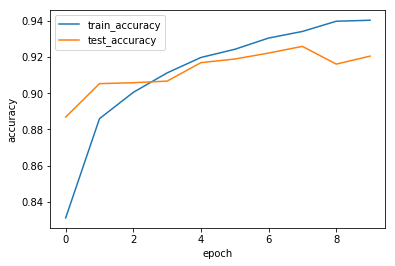

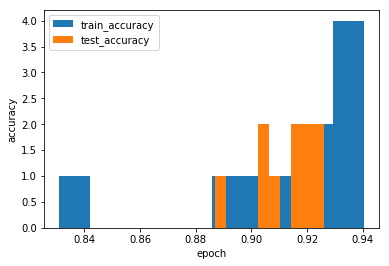

In [47]:
import matplotlib.pyplot as plt
def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

show_history(history)

plt.hist(history.history['acc'])
plt.hist(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
plt.show()

In [44]:
print(history.history)

{'val_loss': [0.3026784381866455, 0.2602888496875763, 0.2459390419960022, 0.2557863576412201, 0.22900965795516967, 0.23135388300418855, 0.23248000565767288, 0.22814430640935898, 0.25542413513660434, 0.23480498613119125], 'val_acc': [0.8868, 0.9053, 0.9058, 0.9067, 0.9169, 0.9189, 0.9222, 0.9259, 0.9161, 0.9205], 'loss': [0.4792439845561981, 0.3167854737917582, 0.27074103905359903, 0.24042479104200998, 0.22033238593737284, 0.2044897220134735, 0.18807606749534608, 0.17422727690935136, 0.16135537901322047, 0.15821656664212544], 'acc': [0.83105, 0.8859333333333334, 0.9004833333333333, 0.9112333333333333, 0.9197666666348775, 0.9242833333015442, 0.9305, 0.93415, 0.9397999999682108, 0.9403500000317891]}
